<a href="https://colab.research.google.com/github/phandat128/Football-player-predict/blob/main/ML_project_dataset1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install unidecode

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.9/235.9 kB 15.8 MB/s eta 0:00:00


In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import plotly.express as px
import math

from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from scipy.cluster.hierarchy import linkage, cut_tree, dendrogram
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')
from unidecode import unidecode

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
stat_df = pd.read_csv('/content/football_player_stat.csv')
stat_df.rename(columns={'names': 'Name'}, inplace=True)
stat_df['Name'] = stat_df['Name'].apply(lambda x: unidecode(x))

price_df = pd.read_csv('/content/football_player_price.csv')
price_df['Name'] = price_df['Name'].apply(lambda x: unidecode(x))

df = pd.merge(stat_df, price_df, how='inner', on='Name')
df = df.drop(['Name', 'clubs'], axis=1)
df

,ages,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,AerialsWon,MotM,Position,Price
0,35,44,3519,0.8,0.1,0.4,0.0,0.0,0.0,0,8.30,27,21,4.1,2.9,2.9,1.8,0.2,2.6,1.7,57.2,83.9,0.9,2.2,0.9,0.2,18,Forward,45000000
1,26,22,1721,1.7,0.8,0.7,0.0,0.4,0.1,0,7.61,12,5,2.5,1.5,0.5,1.3,0.5,0.9,1.6,33.7,74.8,0.2,1.3,0.2,3.7,7,Forward,35000000
2,31,35,2375,0.9,0.2,1.3,0.0,0.1,0.0,0,7.62,20,14,2.3,2.4,2.0,3.4,0.3,2.3,2.4,58.4,83.2,0.9,2.0,0.4,0.0,4,Forward,70000000
3,24,49,3875,0.2,0.1,0.5,0.0,0.1,0.0,0,7.71,43,9,4.0,1.5,2.5,1.2,0.9,1.1,2.0,34.3,82.8,0.5,0.6,0.1,0.2,11,Forward,180000000
4,22,39,3007,1.3,0.2,0.5,0.0,0.3,0.0,0,7.68,19,16,3.3,1.8,2.3,1.2,0.2,1.5,2.5,26.8,81.0,0.6,1.1,0.2,0.4,12,Forward,85000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
892,25,23,1710,0.0,0.0,0.0,0.0,0.7,0.0,0,6.21,0,0,0.0,0.1,0.0,0.1,0.0,0.0,0.0,33.3,78.7,0.0,6.3,0.0,0.2,0,Goalkeeper,1000000
893,20,26,575,0.7,0.3,0.5,0.0,0.3,0.1,0,6.30,1,0,0.5,0.4,0.4,0.3,0.0,0.6,0.8,14.3,83.9,0.0,0.4,0.0,0.2,0,Midfielder,30000000
894,22,28,836,0.7,0.6,0.4,0.0,0.2,0.2,0,6.32,1,0,0.4,0.2,0.3,0.8,0.0,0.2,0.9,14.4,85.0,0.2,0.2,0.0,0.1,1,Defender,15000000
895,25,27,886,0.3,0.1,0.7,0.0,0.6,0.0,0,6.20,2,0,1.0,0.2,0.3,0.5,0.3,0.7,1.3,6.5,69.3,0.0,0.0,0.0,1.1,0,Forward,9000000


In [ ]:
df.isnull().sum()

ages          0
Apps          0
Mins          0
Tackles       0
Inter         0
Fouls         0
Offsides      0
Clear         0
Blocks        0
OwnG          0
Rating        0
Goals         0
Assists       0
SpG           0
KeyP          0
Drb           0
Fouled        0
Off           0
Disp          0
UnsTch        0
AvgP          0
PS%           0
Crosses       0
LongB         0
ThrB          0
AerialsWon    0
MotM          0
Position      0
Price         0
dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df = pd.get_dummies(df)

In [ ]:
numeric_columns = df.select_dtypes('number').columns
categorical_columns = df.select_dtypes('object').columns

<Axes: >

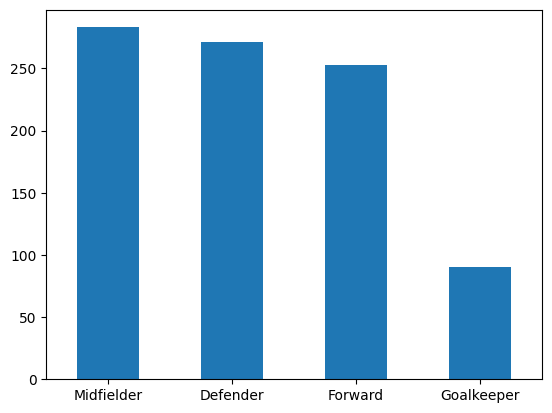

In [ ]:
df['Position'].value_counts().plot.bar(rot=0)

In [ ]:
df['Price'] = np.log(df['Price'])

<Axes: >

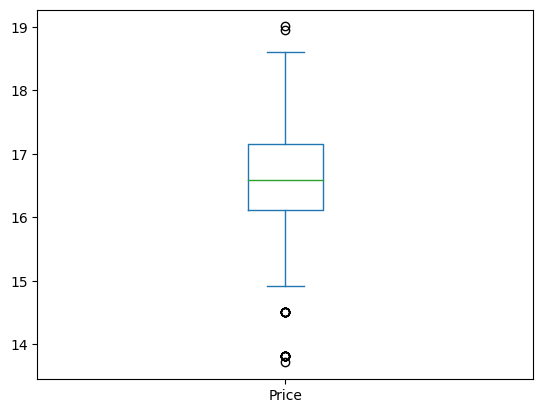

In [ ]:
df.Price.plot.box()

<Axes: >

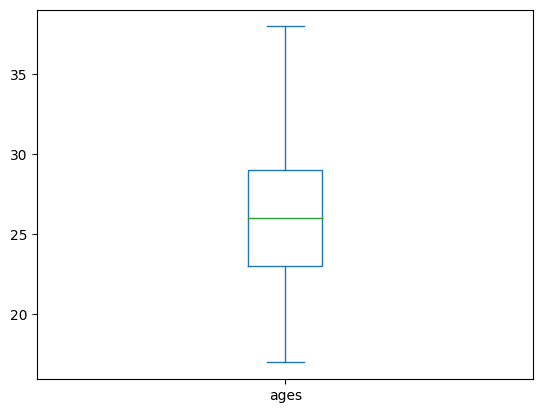

In [ ]:
df['ages'].plot.box()

In [ ]:
def scatterPlotToTarget(columns, target, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].scatter(x=df[columns[col_index]], y=df[target])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
      #correlation
      correlation = df[target].corr(df[columns[col_index]])
      axs[i,j].annotate(f'corr: {correlation}', (0.8, 0.2), xycoords='axes fraction', ha='center', va='center')
  fig.tight_layout()

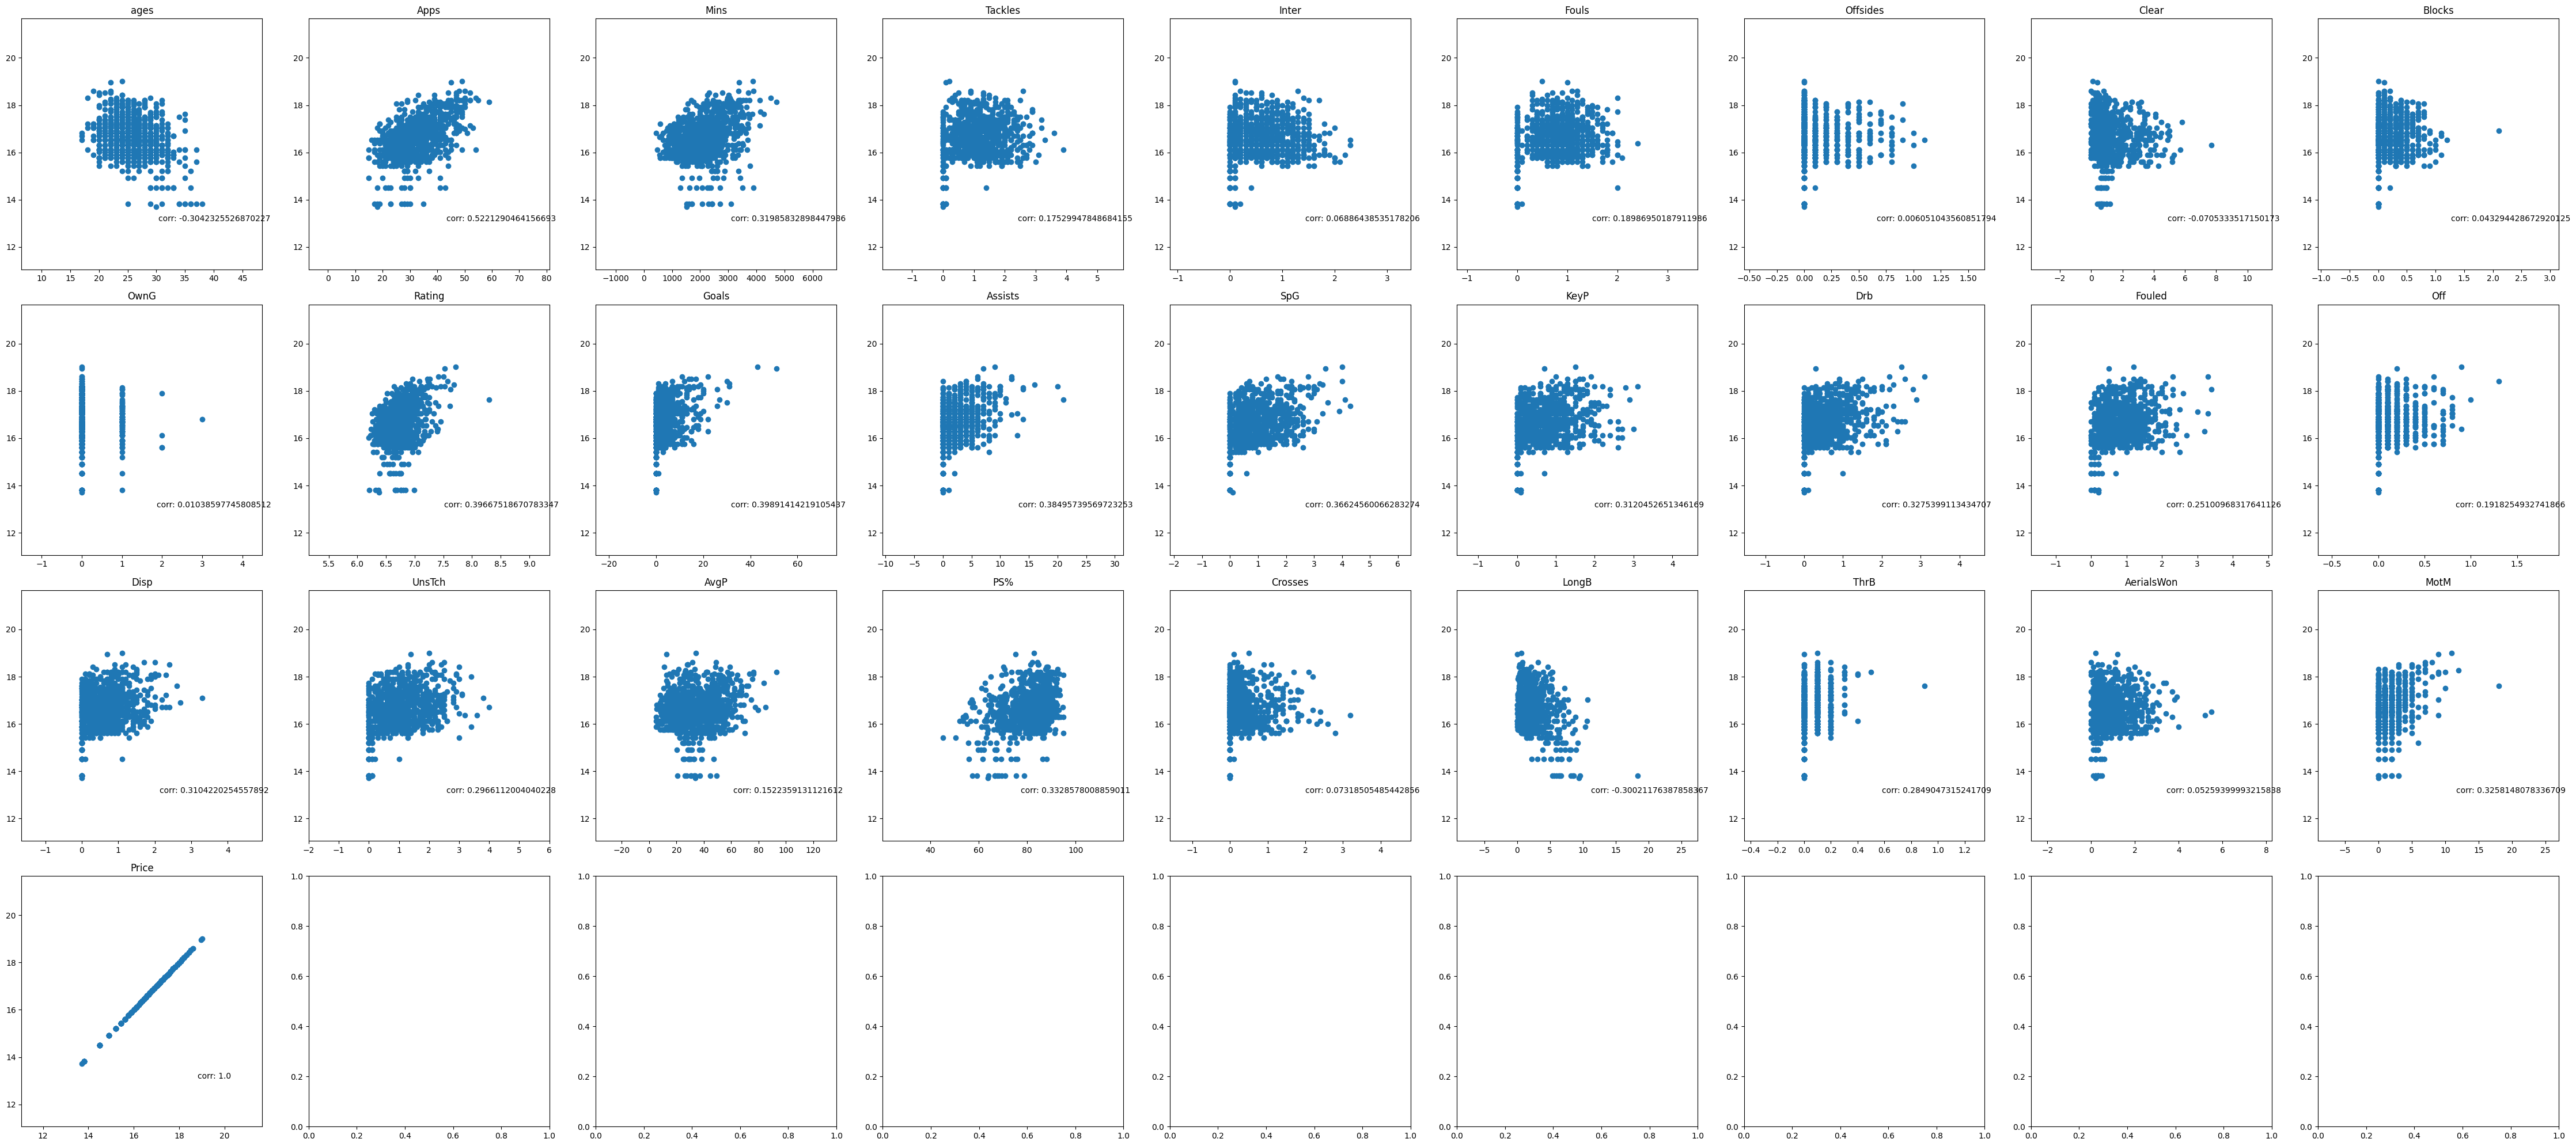

In [ ]:
scatterPlotToTarget(numeric_columns, target='Price', ncolumns=9)

In [ ]:
def plot_boxplot(columns, title, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  fig.suptitle(title)
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].boxplot(x=df[columns[col_index]])
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
  fig.tight_layout()

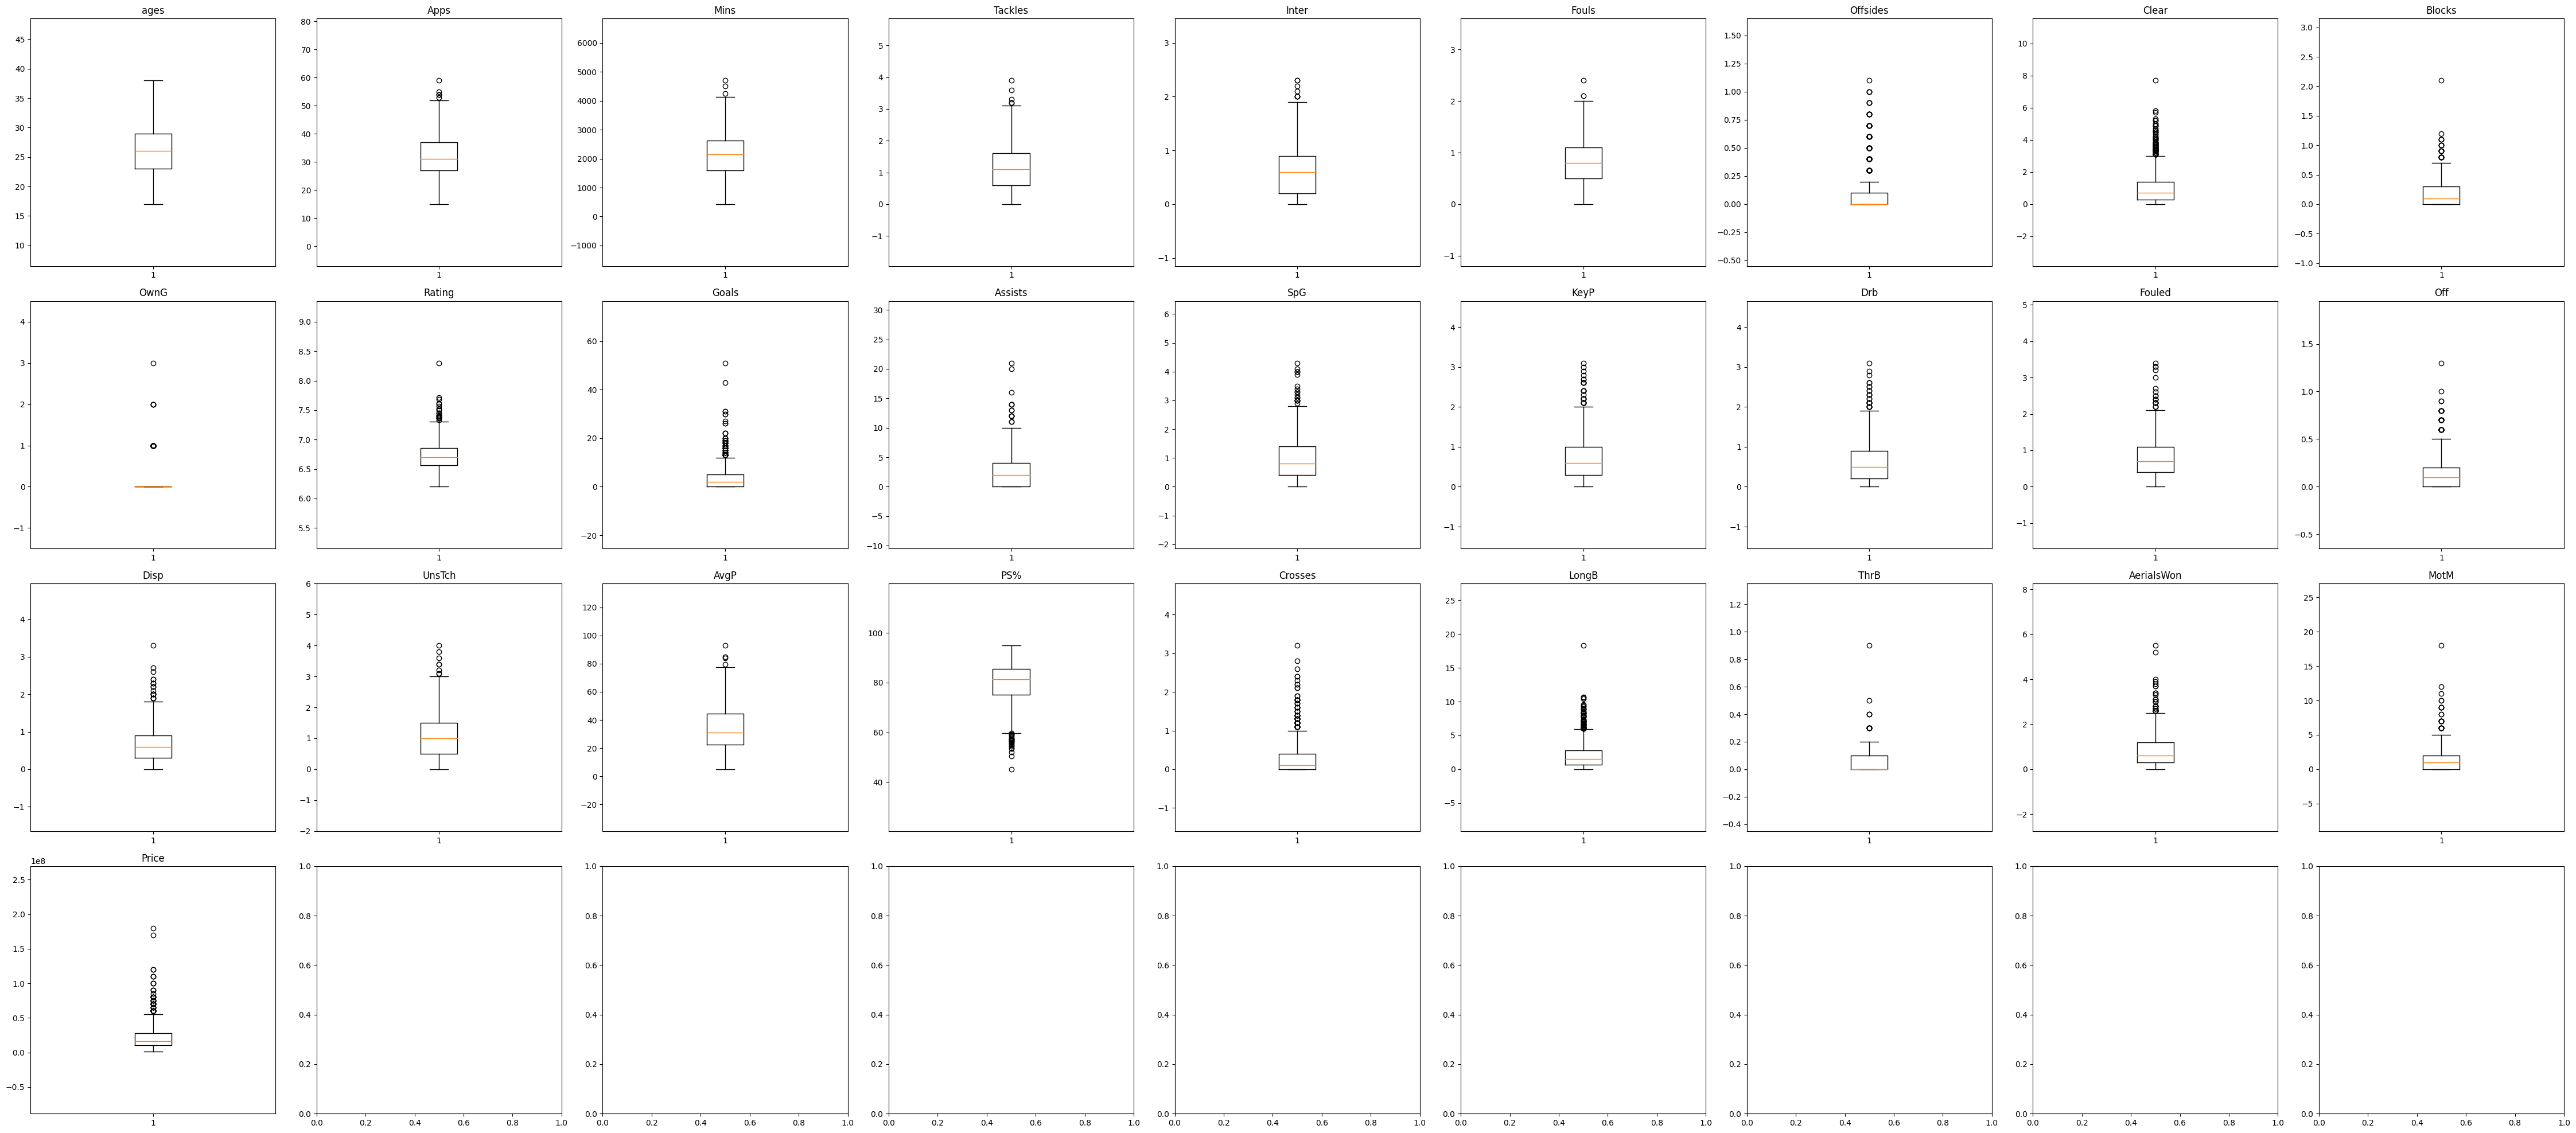

In [ ]:
plot_boxplot(numeric_columns, "", ncolumns=9)

In [ ]:
def histPlot(columns, ncolumns=3):
  nrows = math.ceil(len(columns)/ncolumns)
  fig, axs = plt.subplots(nrows, ncolumns, figsize=(5*ncolumns, nrows*5))
  for i in range(nrows):
    for j in range(ncolumns):
      col_index = i*ncolumns + j
      if col_index >= len(columns): break
      axs[i,j].hist(x=df[columns[col_index]], bins=20)
      axs[i,j].set_title(columns[col_index])
      axs[i,j].margins(0.5)
      #correlation
  fig.tight_layout()

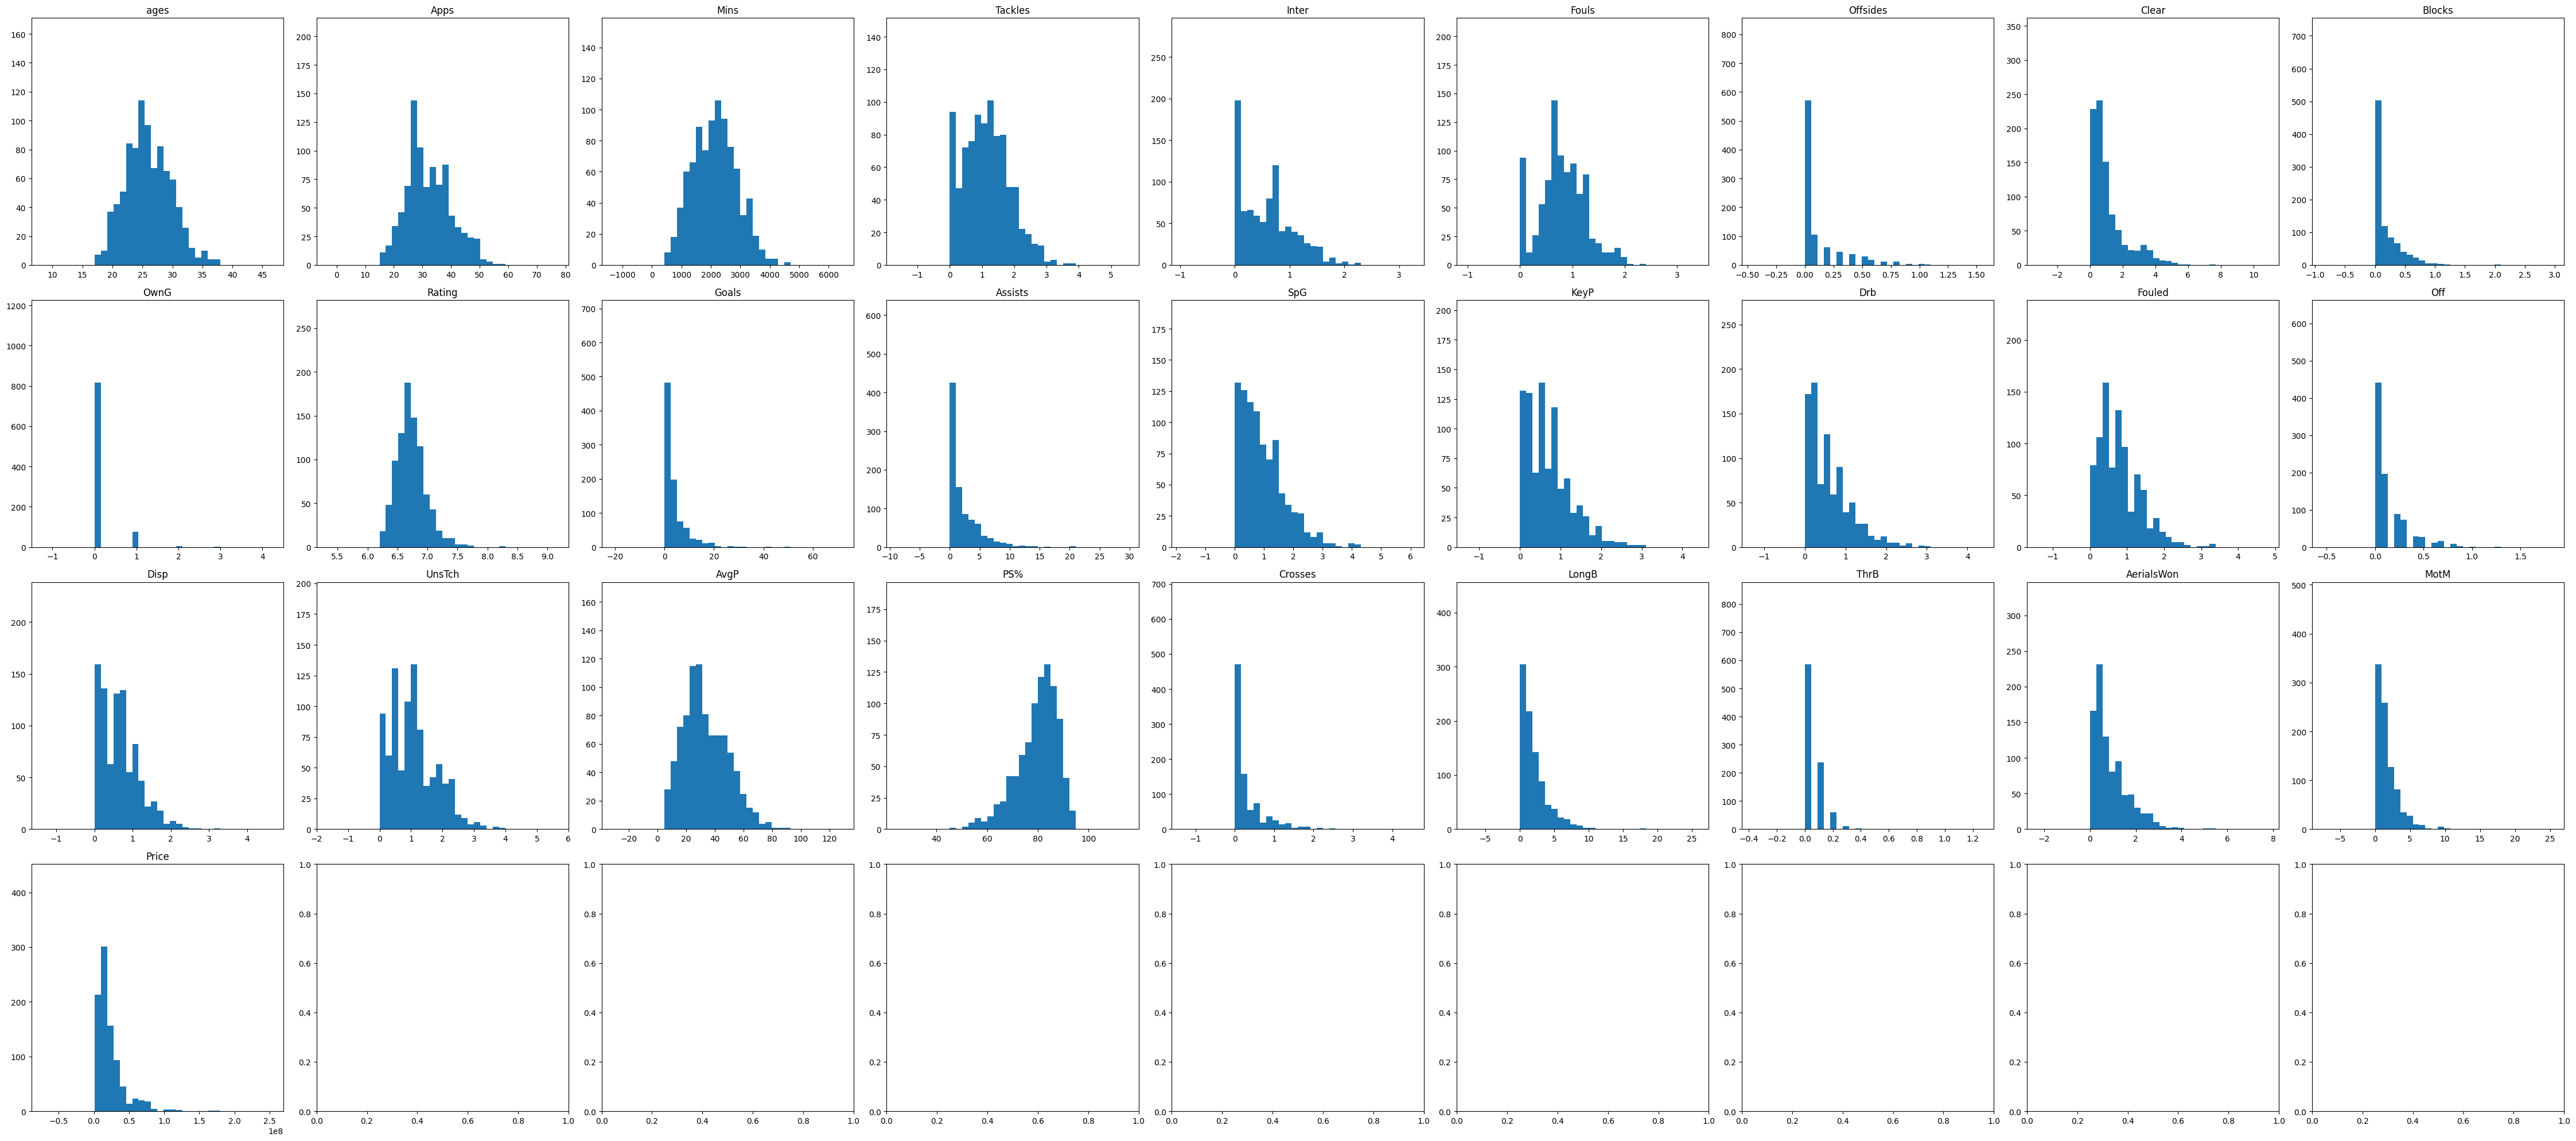

In [ ]:
histPlot(numeric_columns, ncolumns=9)

In [ ]:
for column in numeric_columns:
  if column == 'Price': continue
  # df[column] = np.log(df[column]+1)
  df[column] = (df[column] - df[column].min())/(df[column].max() - df[column].min())

df['Price'] = np.log(df['Price'])

In [ ]:
df.describe()

,ages,Apps,Mins,Tackles,Inter,Fouls,Offsides,Clear,Blocks,OwnG,Rating,Goals,Assists,SpG,KeyP,Drb,Fouled,Off,Disp,UnsTch,AvgP,PS%,Crosses,LongB,ThrB,AerialsWon,MotM,Price
count,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000,897.000000
mean,0.429846,0.390924,0.400695,0.289541,0.263342,0.330314,0.101753,0.143234,0.096194,0.031958,0.252147,0.075896,0.114031,0.221202,0.231237,0.194591,0.236343,0.097590,0.197392,0.266388,0.325686,0.696300,0.098941,0.114035,0.051282,0.161934,0.079091,16.608628
std,0.173287,0.177236,0.172025,0.184617,0.206706,0.185109,0.180807,0.144970,0.111921,0.106669,0.117154,0.102421,0.130316,0.174443,0.180700,0.170162,0.162636,0.142810,0.155032,0.182031,0.175114,0.163044,0.141815,0.109001,0.085852,0.138993,0.102416,0.822509
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,13.710150
25%,0.285714,0.272727,0.274427,0.153846,0.086957,0.208333,0.000000,0.038961,0.000000,0.000000,0.171429,0.000000,0.000000,0.093023,0.096774,0.064516,0.117647,0.000000,0.090909,0.125000,0.199090,0.603622,0.000000,0.038251,0.000000,0.054545,0.000000,16.118096
50%,0.428571,0.363636,0.403460,0.282051,0.260870,0.333333,0.000000,0.090909,0.047619,0.000000,0.238095,0.039216,0.095238,0.186047,0.193548,0.161290,0.205882,0.076923,0.181818,0.250000,0.296928,0.728370,0.031250,0.081967,0.000000,0.109091,0.055556,16.588099
75%,0.571429,0.500000,0.516363,0.410256,0.391304,0.458333,0.090909,0.181818,0.142857,0.000000,0.314286,0.098039,0.190476,0.325581,0.322581,0.290323,0.323529,0.153846,0.272727,0.375000,0.450512,0.812877,0.125000,0.153005,0.111111,0.218182,0.111111,17.147715
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.008467


In [ ]:
# remove outliers
def outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    Lower_fence = Q1 - (1.5*IQR)
    print(f"Lower fence is = {Lower_fence}")

    Higher_fence = Q3 + (1.5*IQR)
    print(f"Higher fence is = {Higher_fence}")


    #With the help of "index" function here we are getting all the indexes of Lower_fence and Higher_fence

    IndexL_Outlier = data[data[column] < Lower_fence ].index
    IndexH_Outlier = data[data[column] > Higher_fence].index

    print(f'\nBEFORE dropping Outlier we have rows = {data.shape[0]}, and columns = {data.shape[1]}')

    data.drop(IndexL_Outlier,inplace=True)
    data.drop(IndexH_Outlier,inplace=True)

    print(f'AFTER dropping Outlier we have rows = {data.shape[0]}, and columns = {data.shape[1]}')

In [ ]:
outliers(df, 'Price')

Lower fence is = 14.573666525186582
Higher fence is = 18.69214419391122

BEFORE dropping Outlier we have rows = 897, and columns = 29
AFTER dropping Outlier we have rows = 873, and columns = 29


In [ ]:
# loại bỏ các cột có |correlation| < 0.2 so với giá trị mục tiêu
price_corr = []
for column in numeric_columns:
  price_corr.append(df['Price'].corr(df[column]))
no_corr_column_indexes = [i for i in range(len(price_corr)) if abs(price_corr[i]) < 0.2]
df1 = df.drop(df.columns[no_corr_column_indexes], axis=1)
print(f'Dropped {len(no_corr_column_indexes)} column(s): {df.columns[no_corr_column_indexes].to_list()}')

Dropped 18 column(s): ['ages', 'Tackles', 'Inter', 'Fouls', 'Offsides', 'Clear', 'Blocks', 'OwnG', 'KeyP', 'Drb', 'Fouled', 'Off', 'Disp', 'UnsTch', 'AvgP', 'Crosses', 'LongB', 'AerialsWon']


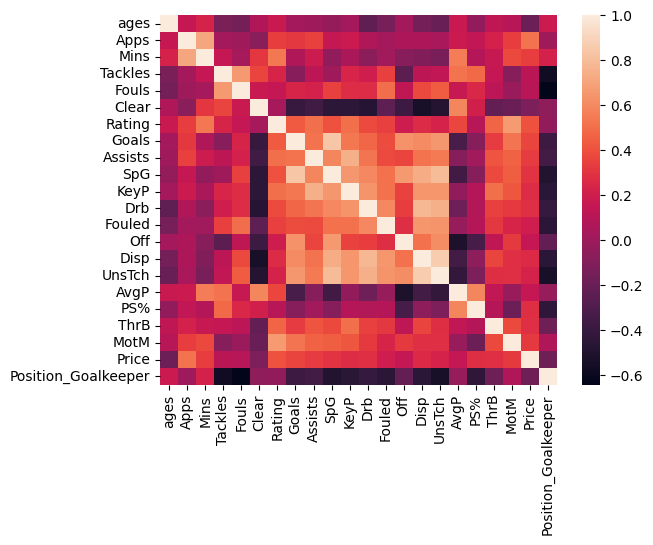

In [ ]:
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=False)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

y = df['Price']
X = df.drop(['Price', 'Position'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor


models = {
    'linear_regression': LinearRegression(),
    'ridge_regression': Ridge(0.2),
    'lasso_regression': Lasso(0.001),
    'mlp_model': MLPRegressor((50,50)),
    'decision_tree': DecisionTreeRegressor(),
    'random_forest': RandomForestRegressor(100)
}

for (model_name, model) in models.items():
  model.fit(X_train, y_train)
  y_pred = model.predict(X_test)
  print(model_name)
  print('MAE: ', mean_absolute_error(y_test, y_pred))
  print('RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
  print('r2 score: ', r2_score(y_test, y_pred))
  print()

linear_regression
MAE:  0.4303542918936074
RMSE:  0.5177225626443263
r2 score:  0.5090700285790193

ridge_regression
MAE:  0.4301109864370403
RMSE:  0.5174687245557841
r2 score:  0.5095513140585686

lasso_regression
MAE:  0.43264048250701087
RMSE:  0.520196906436139
r2 score:  0.5043662262559427

mlp_model
MAE:  0.5348254983885165
RMSE:  0.6673271401067705
r2 score:  0.18435169475761193

decision_tree
MAE:  0.6504949025023303
RMSE:  0.8271701892463671
r2 score:  -0.25318477773771275

random_forest
MAE:  0.4483000292926194
RMSE:  0.541536690399737
r2 score:  0.4628678655851868



In [ ]:
y_pred = models['linear_regression'].predict(X_test)
pd.DataFrame(zip(y_test, y_pred), columns=['target', 'predict'])

,target,predict
0,15.201805,15.778775
1,15.607270,15.819304
2,17.034386,16.708374
3,16.012735,16.334391
4,17.034386,17.309686
...,...,...
161,16.380460,16.468939
162,16.523561,18.225992
163,17.216708,16.998427
164,16.118096,15.809317


In [ ]:
# pd.DataFrame([tuple(models['lasso_regression'].coef_)], columns=X.columns)
models['lasso_regression'].coef_

array([ 0.        ,  0.        ,  1.40763976, ...,  0.        ,
        0.        , -0.        ])

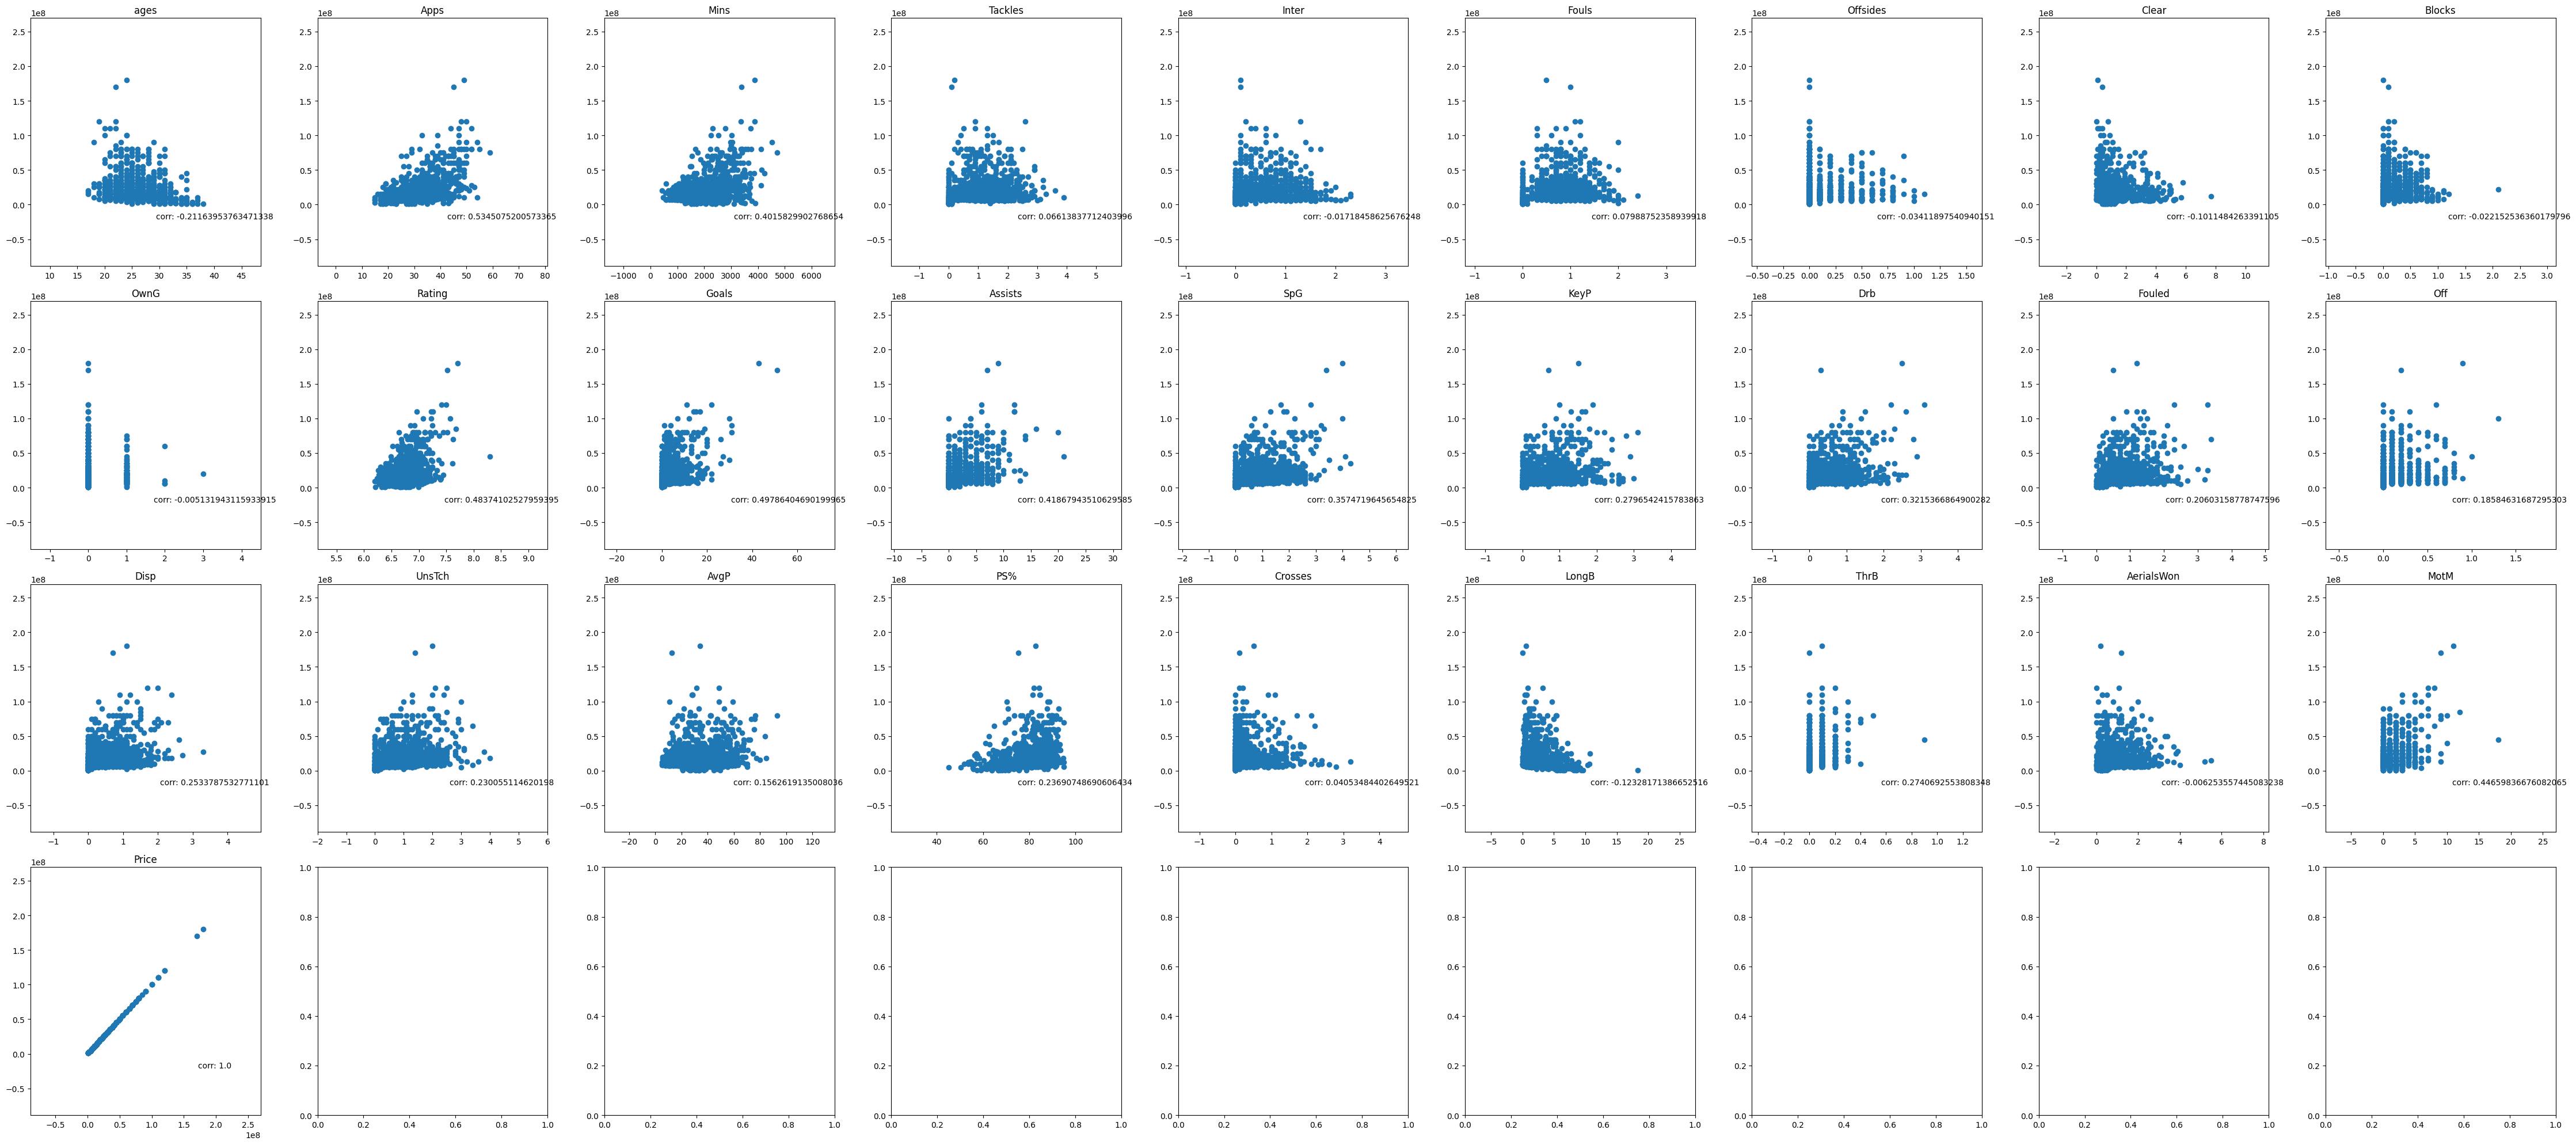

In [ ]:
fw_df = df[df['Position'] == 'Forward']
scatterPlotToTarget(numeric_columns, target='Price', ncolumns=9)